**Summary Of DoS Detection Analysis**

**1. Objective:** This analysis aimed to detect and mitigate Denial of Service (DoS) attacks, which disrupt normal network operations by inundating systems with excessive traffic.

**2. Approach:** Here, I used various analytical techniques including time-series analysis, correlation assessments, and anomaly detection algorithms like Isolation Forest to uncover potential DoS attack vectors and manifestations in network traffic.

**3. Key Insights:** Through meticulous examination of data, I identified peak patterns in request volumes and resource utilization, indicative of potential DoS attacks.
Compelling visualizations such as box plots, bar charts, and heatmaps provided nuanced insights into the relationships between bot activity, resource utilization, and network anomalies.
Correlation assessments illuminated critical features indicative of malicious behavior, enabling proactive defense measures.

**4. Results:** The analysis provided a robust framework for proactive threat detection and mitigation strategies.
By leveraging data-driven insights and implementing robust defense mechanisms, organizations can fortify their networks against the disruptive effects of DoS attacks.

**5. Conclusion:** Although the analysis has uncovered anomalies and potentially concerning patterns within the data, further investigation is warranted to definitively pinpoint genuine DoS attacks. Nevertheless, this analysis serves as an initial step in highlighting areas ripe for deeper exploration. Gathering additional data over an extended timeframe holds promise for revealing more nuanced attack patterns. Moreover, refining the analysis methodology through model tuning, integration with rule-based techniques, and other enhancements can enhance its effectiveness. Overall, the techniques showcased herein offer a solid foundation for identifying potential DoS attacks within network traffic data, emphasizing the critical need for proactive defense measures to safeguard network infrastructure and ensure seamless service delivery amidst the ever-evolving landscape of cyber threats.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [4]:
data = pd.read_csv("dataset.csv")

In [5]:
data.head(20)

,Id,IP,bot,FunctionId,functionTrigger,timestamp,SubmitTime,RTT,InvocationDelay,ResponseDelay,FunctionDuration,ActiveFunctionsAtRequest,ActiveFunctionsAtResponse,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket
0,0,38.57.146.249,True,12,notification,2022-01-02T03:31:34.498Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0
1,1,55.220.132.116,True,12,notification,2022-01-02T03:54:53.136Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0
2,2,141.232.38.48,True,12,notification,2022-01-02T03:38:31.950Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0
3,3,228.143.56.163,True,12,notification,2022-01-02T03:44:36.548Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0
4,4,223.113.21.186,True,12,notification,2022-01-02T03:52:54.326Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0
5,5,223.113.21.186,True,12,notification,2022-01-02T03:53:51.412Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0
6,6,243.138.37.32,True,12,notification,2022-01-02T03:24:03.665Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0
7,7,243.138.37.32,True,12,notification,2022-01-02T03:24:48.516Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0
8,8,94.35.80.22,True,12,notification,2022-01-02T03:30:07.778Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0
9,9,112.21.188.21,True,12,notification,2022-01-02T03:14:21.516Z,73,2616,1416.003662,154.615479,1045.380831,12,999,100.0,19.867088,97.914746,Delay-insensitive,8,56.0


**Factors to consider in detecting potential dos attacks include**

1. Monitor spikes in request rates per IP.

2. Identify unusual execution times with FunctionDuration.

3. Watch for high InvocationDelay or ResponseDelay, indicating system overload.

4. Plot avgcpu and maxcpu trends for sudden resource spikes.

5. Employ anomaly detection models like Isolation Forest on request counts, delays, and resource usage.

6. Compare VM cores and memory with active functions and CPU usage to spot overloaded VMs.

In [6]:
# Checking the number of rows and columns in the given dataset
data.shape

(187087, 19)

In [7]:
# Checking for bot activity (False --> Benign and True --> Malicious (attack))
data.bot.value_counts()

True     131072
False     56015
Name: bot, dtype: int64

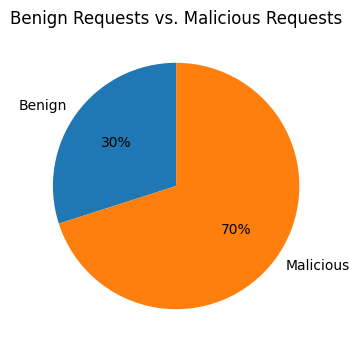

In [11]:
# Pie Chart to visualize Benign vs. Malicious requests
import matplotlib.pyplot as plt

labels = ["Benign", "Malicious"]
size = [data['bot'].value_counts()[False], data['bot'].value_counts()[True]]

plt.figure(figsize=(9, 4))
plt.pie(size, labels=labels, autopct='%1.0f%%', shadow=False, startangle=90)
plt.title('Benign Requests vs. Malicious Requests')
plt.show()


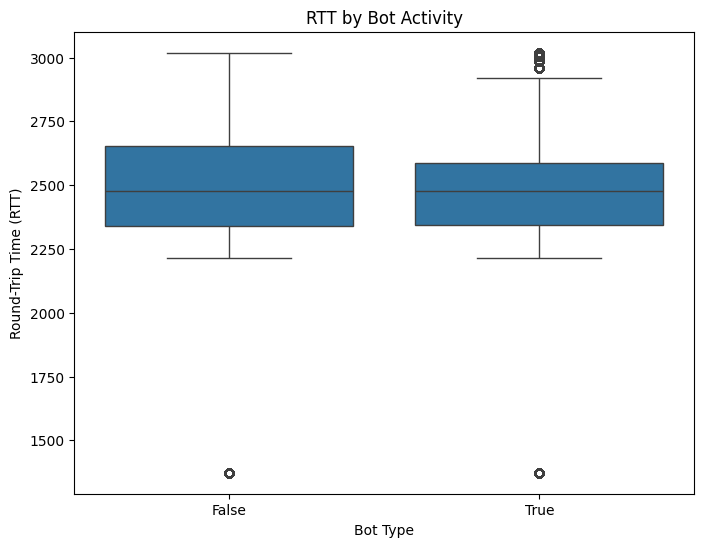

In [13]:
# Box plot of round-trip time (RTT) by bot activity
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='bot', y='RTT', data=data)
plt.title('RTT by Bot Activity')
plt.xlabel('Bot Type')
plt.ylabel('Round-Trip Time (RTT)')
plt.show()

**Box Plot: RTT by Bot Activity**

The round-trip time (RTT) measures the latency or delay in data transmission over a network, representing the time for data to travel from source to destination and back.

In this analysis, the box plot illustrates RTT distribution between benign and malicious bot activities. By interpreting the plot, you can discern typical RTT values for each bot activity type and detect any discrepancies or trends in their distribution. This insight aids in network analysis, optimizing performance, and pinpointing potential anomalies or malicious network behavior.

<ipython-input-14-81a2dd6a5576>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


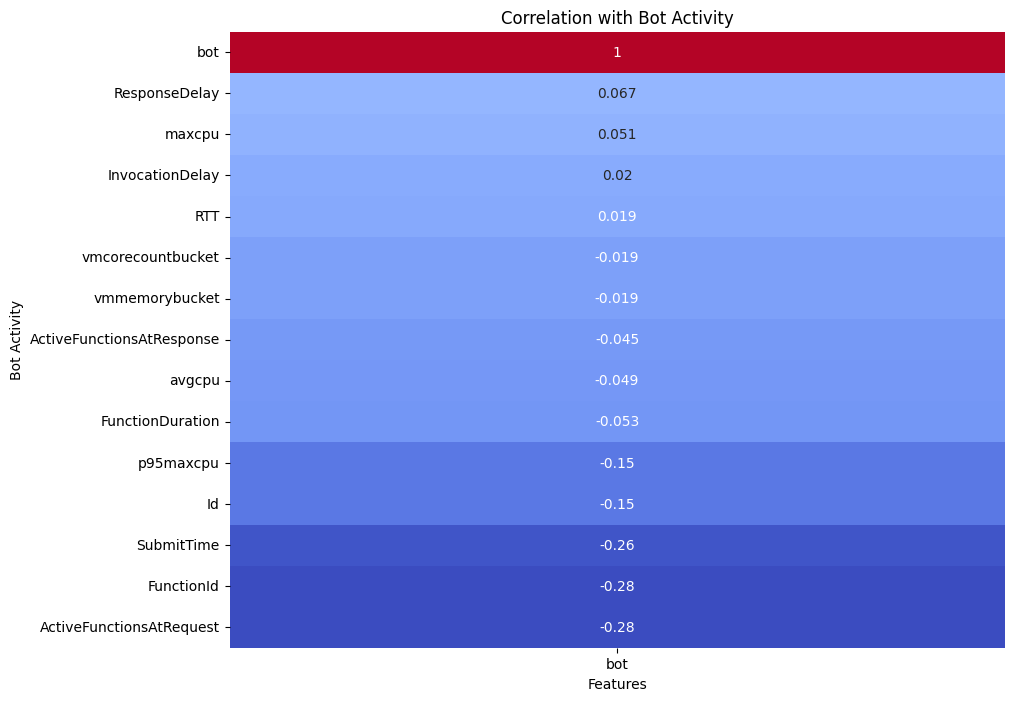

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
bot_correlation = correlation_matrix['bot'].sort_values(ascending=False)
sns.heatmap(bot_correlation.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation with Bot Activity')
plt.xlabel('Features')
plt.ylabel('Bot Activity')
plt.show()

**Bot Activity Correlation Analysis**

**Key Points**

1. The heatmap illustrates correlation coefficients between 'bot' activity and other dataset features.

2. Higher coefficients near 1 signify stronger positive correlation, while those near -1 indicate stronger negative correlation.

3. Positively correlated features might strongly influence botnet behavior presence, while negatively correlated features might have less association with bot activity.

4. Analyzing these coefficients can offer insights into crucial features for predicting or detecting bot activity in network traffic data.
Features with higher positive correlation could potentially serve as indicators of malicious bot behavior, warranting further investigation or feature engineering in botnet detection algorithms.

In [15]:
# Checking for null values in the dataset
data.isnull().sum()

Id                           0
IP                           0
bot                          0
FunctionId                   0
functionTrigger              0
timestamp                    0
SubmitTime                   0
RTT                          0
InvocationDelay              0
ResponseDelay                0
FunctionDuration             0
ActiveFunctionsAtRequest     0
ActiveFunctionsAtResponse    0
maxcpu                       0
avgcpu                       0
p95maxcpu                    0
vmcategory                   0
vmcorecountbucket            0
vmmemorybucket               0
dtype: int64

In [16]:
# Checking for the number of requests per IP Address
requests_per_ip = data['IP'].value_counts()
print(requests_per_ip)

158.135.184.38    2159
190.50.77.86      2155
142.45.98.176     2070
227.200.85.209    1800
84.243.175.245    1800
                  ... 
204.99.250.152       1
38.250.139.62        1
214.88.87.14         1
211.253.165.77       1
58.147.76.78         1
Name: IP, Length: 7587, dtype: int64


In [21]:
# Checking for the number of attack requests by each IP bot address
attack_reqs = data[data['bot'] == True]['IP'].value_counts()
print(attack_reqs)

158.135.184.38     2159
190.50.77.86       2155
142.45.98.176      2070
84.243.175.245     1800
227.200.85.209     1800
                   ... 
212.133.126.132     720
206.191.90.105      711
43.198.161.62       630
40.57.198.164       360
46.240.71.108       270
Name: IP, Length: 100, dtype: int64


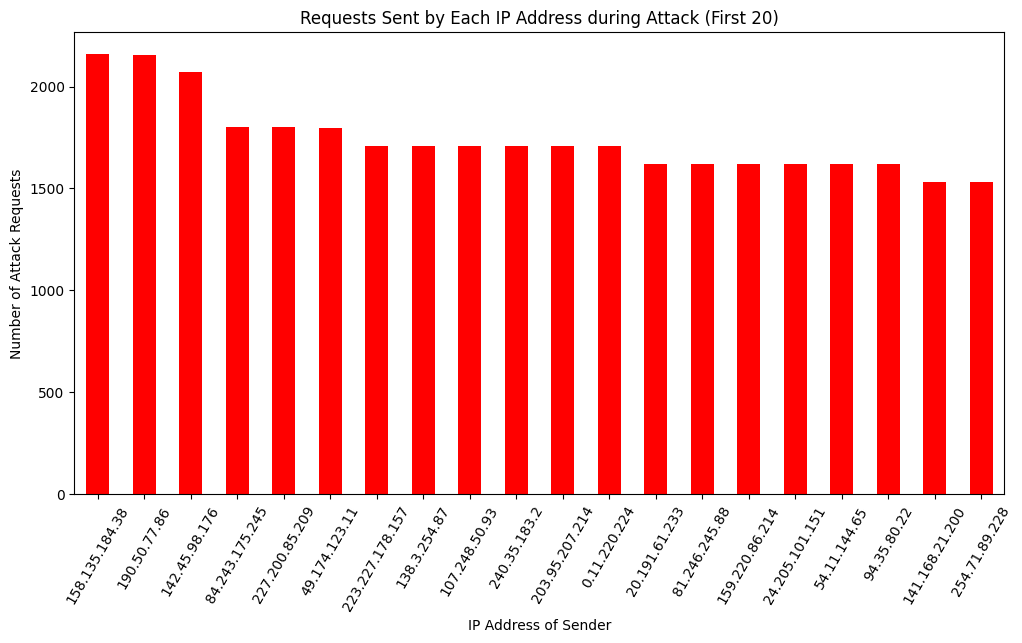

In [22]:
attack_reqs_trun = attack_reqs.head(20)

plt.figure(figsize=(12, 6))
attack_reqs_trun.plot(kind='bar', color='red')
plt.xlabel('IP Address of Sender')
plt.ylabel('Number of Attack Requests')
plt.title('Requests Sent by Each IP Address during Attack (First 20)')
plt.xticks(rotation=60)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


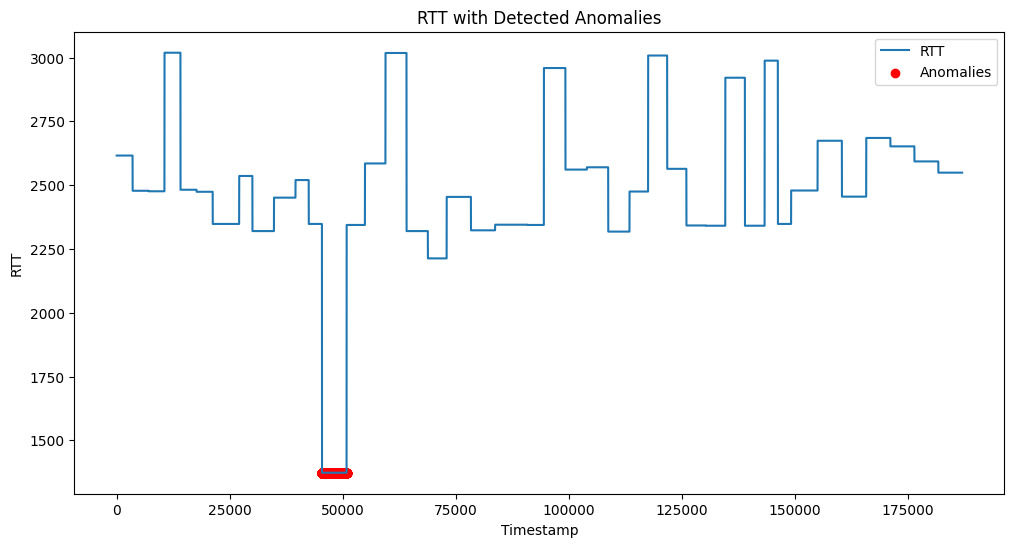

In [23]:
# Checking for Anomalies in the RTT
from sklearn.ensemble import IsolationForest

# Fit Isolation Forest model
model = IsolationForest(contamination=0.05)
model.fit(data[['RTT']])
anomalies = model.predict(data[['RTT']])

# Plot RTT with detected anomalies
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['RTT'], label='RTT')
plt.scatter(data.index[anomalies == -1], data['RTT'][anomalies == -1], color='red', label='Anomalies')
plt.title('RTT with Detected Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('RTT')
plt.legend()
plt.show()


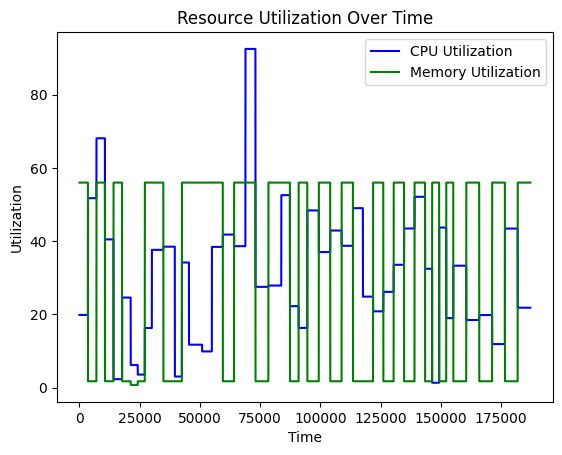

In [24]:
# Resource utilization analysis
resource_utilization = data.groupby(data.index).mean(numeric_only=True)[['avgcpu', 'vmmemorybucket']]

# Plot resource utilization over time
resource_utilization.plot(color=['blue', 'green'])  # Changing line colors
plt.title('Resource Utilization Over Time')
plt.xlabel('Time')
plt.ylabel('Utilization')
plt.legend(['CPU Utilization', 'Memory Utilization'])
plt.show()


**Resource Utilization Over Time**

The chart depicts the average utilization of CPU and memory over time.

1. Time is shown on the x-axis, while utilization is shown on the y-axis. The blue line represents CPU usage, and the orange line represents memory usage.

2. Both CPU and memory usage exhibit fluctuations over time, suggesting varying resource demands. Peaks and valleys in the chart may indicate periods of high or low resource usage.

3. Analyzing these trends offers insights into system performance and capacity planning, facilitating resource allocation optimization and bottleneck prevention.

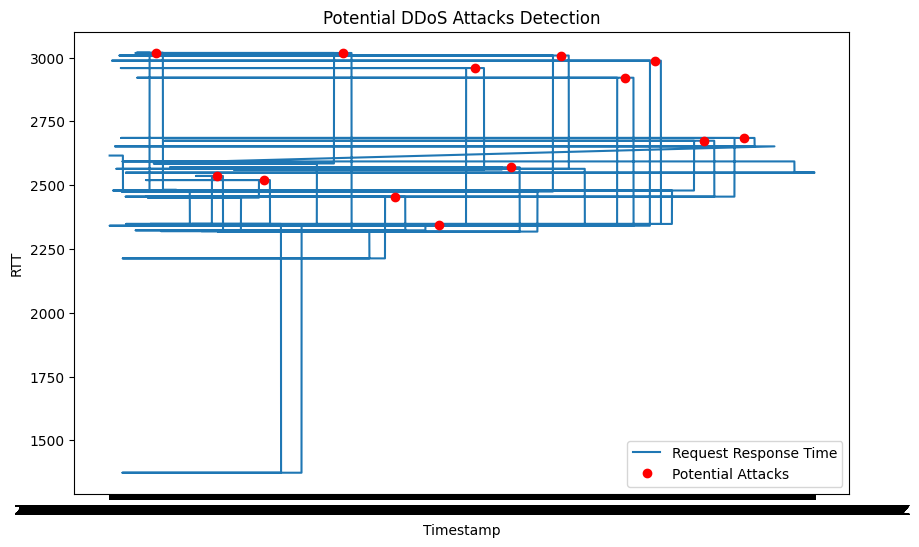

In [27]:
# Security analysis: Detect potential DDoS attacks based on request patterns
from scipy.signal import find_peaks

# Find peaks in request volume
threshold = 100  # Adjust threshold as needed
distance = 10  # Adjust distance as needed
peaks, _ = find_peaks(data['RTT'], height=threshold, distance=distance)

# Identify potential DDoS attacks
potential_attacks = data.iloc[peaks]

# Visualize potential DDoS attacks
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['RTT'], label='Request Response Time')
plt.plot(potential_attacks['timestamp'], potential_attacks['RTT'], 'ro', label='Potential Attacks')
plt.title('Potential DDoS Attacks Detection')
plt.xlabel('Timestamp')
plt.ylabel('RTT')
plt.legend()
plt.show()